In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import sklearn as sklearn
from sklearn.cluster import DBSCAN




In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os
os.chdir("/content/drive/My Drive/ML/data/Dataset/")

In [4]:
df=pd.read_csv("childrens_violence new.csv")
df.head(10)

,Entity,Code,Year,Childrens Violent Discipline Rate\n\n\n\n\n\n
0,Georgia,GEO,2005,67
1,Tajikistan,TJK,2005,78
2,Azerbaijan,AZE,2006,77
3,Burkina Faso,BFA,2006,83
4,Cote d'Ivoire,CIV,2006,91
5,Djibouti,DJI,2006,72
6,Syria,SYR,2006,89
7,Trinidad and Tobago,TTO,2006,77
8,Liberia,LBR,2007,90
9,Morocco,MAR,2007,91


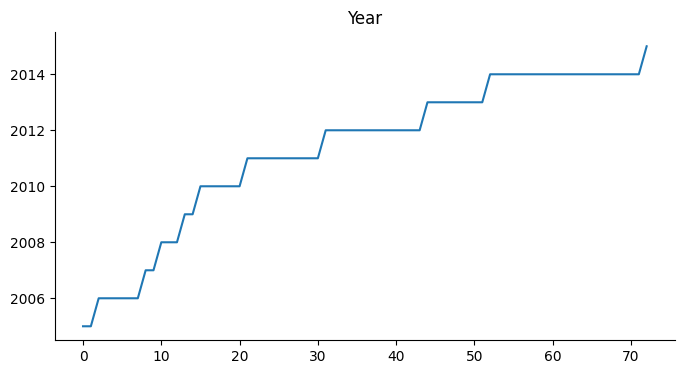

In [5]:
# @title Year

from matplotlib import pyplot as plt
df['Year'].plot(kind='line', figsize=(8, 4), title='Year')
plt.gca().spines[['top', 'right']].set_visible(False)

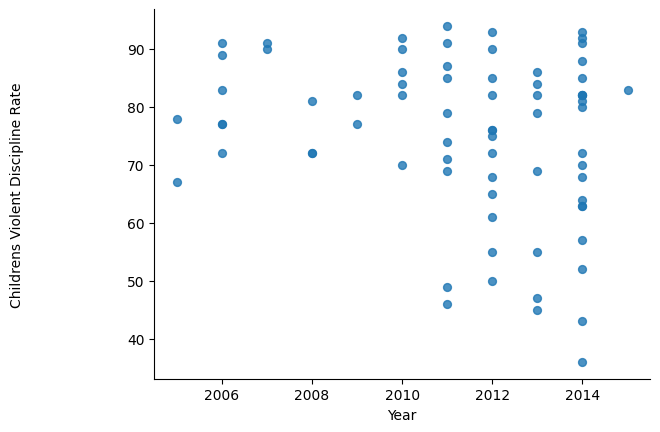

In [6]:
# @title Year vs Childrens Violent Discipline Rate







from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Year', y='Childrens Violent Discipline Rate\n\n\n\n\n\n', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

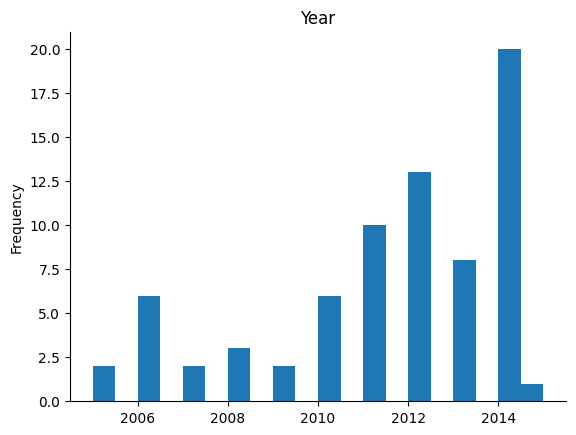

In [7]:
# @title Year

from matplotlib import pyplot as plt
df['Year'].plot(kind='hist', bins=20, title='Year')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [8]:
df.shape


(73, 4)

In [9]:
df.isnull().sum()

Entity                                           0
Code                                             0
Year                                             0
Childrens Violent Discipline Rate\n\n\n\n\n\n    0
dtype: int64

<ipython-input-10-36d984d66f3b>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


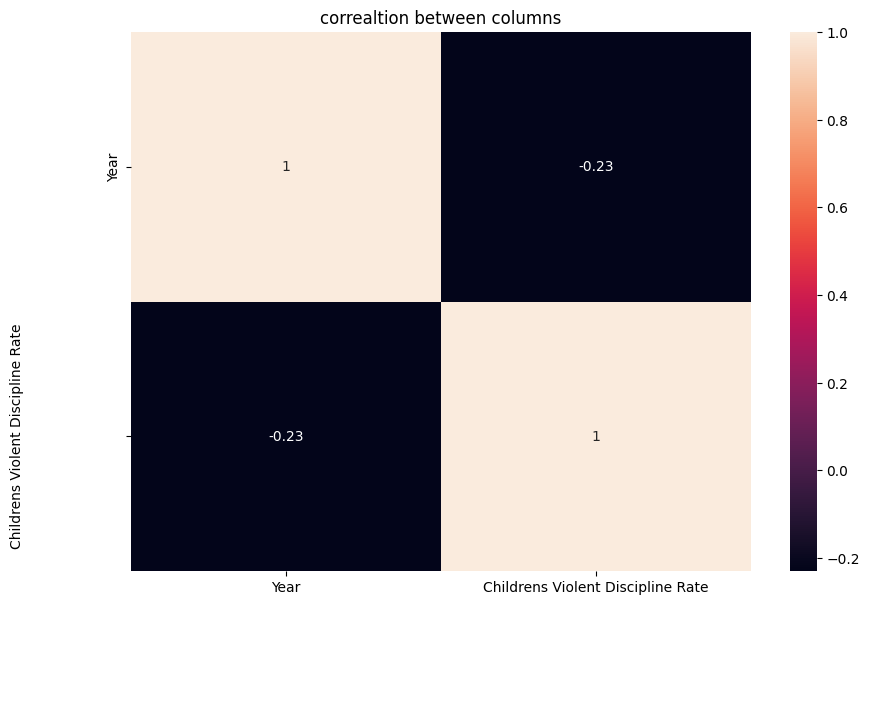

In [10]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(), annot=True)
plt.title('correaltion between columns')
plt.show()

In [11]:
import pandas as pd

# Read the CSV file into a DataFrame
dataset = pd.read_csv('childrens_violence new.csv')

# Rename the column
dataset = dataset.rename(columns={'Childrens Violent Discipline Rate': 'Violent_Discipline_Rate'})

# Now the column has been renamed, you can continue with your analysis


In [12]:
print(dataset.columns)


Index(['Entity', 'Code', 'Year',
       'Childrens Violent Discipline Rate\n\n\n\n\n\n'],
      dtype='object')


In [13]:
# Assuming the actual column name is different or contains spaces
# You can adjust the column name accordingly
dataset = dataset.rename(columns={'Childrens Violent Discipline Rate\n\n\n\n\n\n': 'Violent_Discipline_Rate'})


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

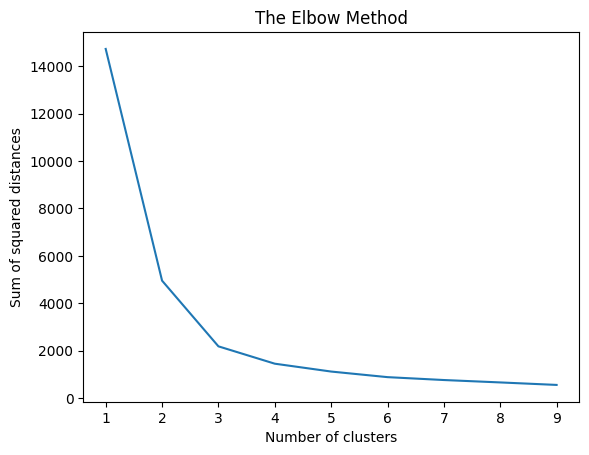

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer

# Select only numeric columns from the DataFrame
df_numeric = df.select_dtypes(include=[np.number])

# Impute missing values in the numeric DataFrame
imputer = SimpleImputer(strategy='mean')
df_imputed = pd.DataFrame(imputer.fit_transform(df_numeric), columns=df_numeric.columns)

# Apply KMeans clustering to the imputed numeric DataFrame
wss = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(df_imputed)
    wss.append(kmeans.inertia_)

# Plotting the elbow method
plt.plot(range(1, 10), wss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared distances')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

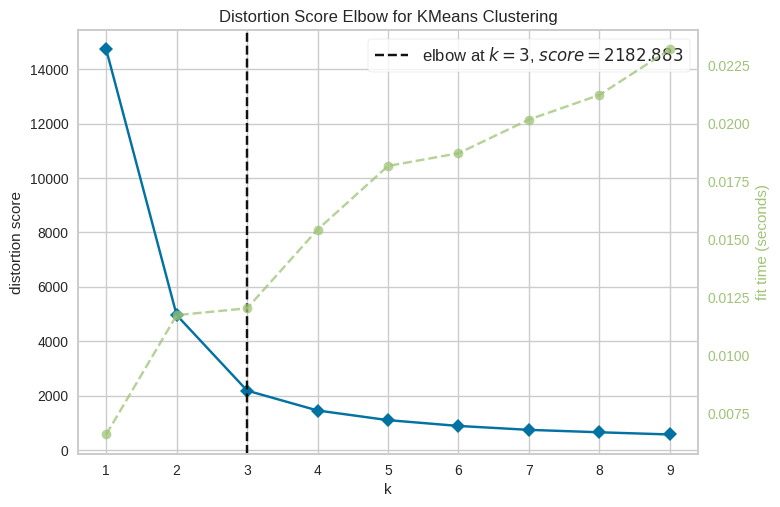

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [15]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer
import pandas as pd

# Assuming 'df' is your DataFrame containing both numeric and non-numeric columns
# Select only numeric columns
df_numeric = df.select_dtypes(include=['number'])

# Impute missing values in the numeric DataFrame
imputer = SimpleImputer(strategy='mean')
df_imputed = pd.DataFrame(imputer.fit_transform(df_numeric), columns=df_numeric.columns)

# Create a KMeans object
model = KMeans()

# Create the KElbowVisualizer
visualizer = KElbowVisualizer(model, k=(1, 10), timing=False)

# Fit the visualizer to the imputed numeric data
visualizer.fit(df_imputed)

# Show the visualizer
visualizer.show()


In [16]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import pandas as pd

# Assuming 'df' is your DataFrame
# Select only numeric columns
df_numeric = df.select_dtypes(include=['number'])

# Check for missing values and handle them if needed
# For example, you can fill missing values with the mean of each column
df_numeric = df_numeric.fillna(df_numeric.mean())

# Perform clustering
for i in range(2, 10):
    kmeans = KMeans(n_clusters=i, max_iter=100)
    kmeans.fit(df_numeric)
    score = silhouette_score(df_numeric, kmeans.labels_)
    print("For cluster: {}, the silhouette score is: {}".format(i, score))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

For cluster: 2, the silhouette score is: 0.5592212635967275
For cluster: 3, the silhouette score is: 0.5423603676810627
For cluster: 4, the silhouette score is: 0.4709524339850201
For cluster: 5, the silhouette score is: 0.43864972054023654
For cluster: 6, the silhouette score is: 0.4237957522453972
For cluster: 7, the silhouette score is: 0.4063008689920632
For cluster: 8, the silhouette score is: 0.40486712667392555
For cluster: 9, the silhouette score is: 0.39940729795822555


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

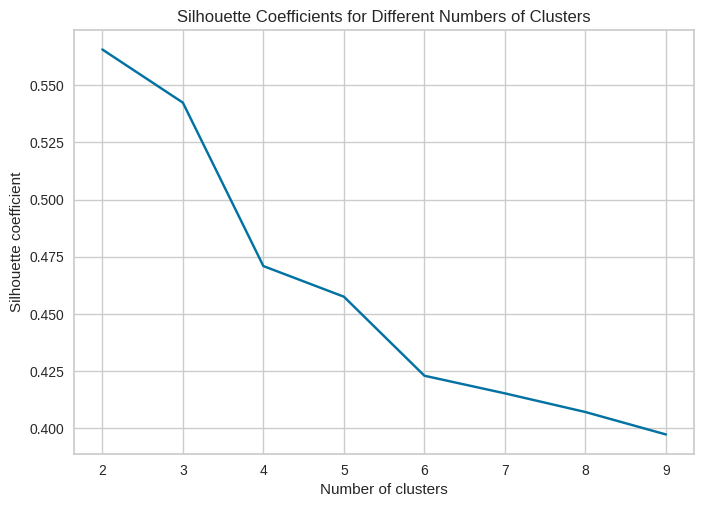

In [17]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import pandas as pd
import numpy as np

# Assuming 'df' is your DataFrame
# Select only numeric columns
df_numeric = df.select_dtypes(include=np.number)

# Handle missing values if needed (filling with mean in this example)
df_numeric = df_numeric.fillna(df_numeric.mean())

# Calculate silhouette scores
silhouette_coefficients = []
for i in range(2, 10):
    kmeans = KMeans(n_clusters=i, max_iter=100)
    kmeans.fit(df_numeric)
    score = silhouette_score(df_numeric, kmeans.labels_)
    silhouette_coefficients.append(score)

# Plot silhouette coefficients
plt.plot(range(2, 10), silhouette_coefficients)
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette coefficient")
plt.title("Silhouette Coefficients for Different Numbers of Clusters")
plt.show()

<ipython-input-19-0eba97c42eca>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  X = df.select_dtypes(include=np.number).fillna(df.mean()).values
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


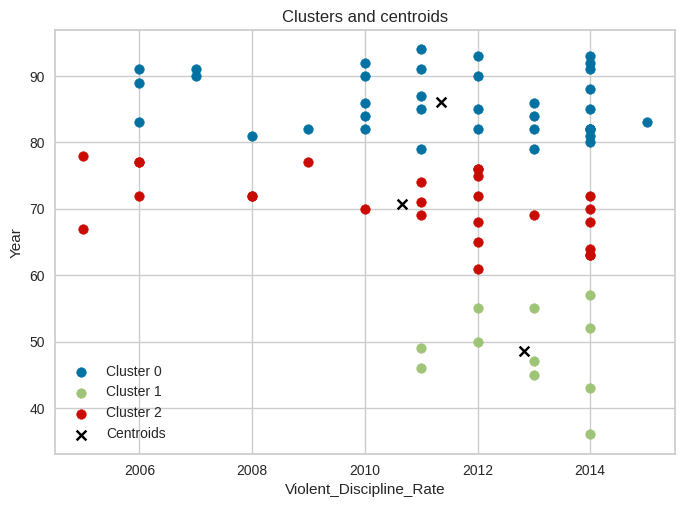

In [19]:
# Assuming 'df' is your DataFrame
X = df.select_dtypes(include=np.number).fillna(df.mean()).values

# Perform KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(X)

# Plot data points with cluster labels
unique_labels = set(labels)
for i in unique_labels:
    plt.scatter(X[labels == i, 0], X[labels == i, 1], label=f'Cluster {i}')

# Plot centroids
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', color='black', label='Centroids')

plt.legend()
plt.title('Clusters and centroids')
plt.xlabel('Violent_Discipline_Rate')
plt.ylabel('Year')
plt.show()

In [22]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import numpy as np

# Assuming 'df' is your DataFrame
X = df.select_dtypes(include=np.number).fillna(df.mean()).values

# Initialize PCA object
pca = PCA(n_components=2)  # You can choose the number of components you want
X_pca = pca.fit_transform(X)

# Perform KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(X)

# Transform PCA-reduced data back to the original space
X_original = pca.inverse_transform(X_pca)

# Add cluster labels to the original DataFrame
df['Cluster'] = labels

# Now you can analyze the clusters along with the original features
print(df.head())


          Entity Code  Year  Childrens Violent Discipline Rate\n\n\n\n\n\n  \
0        Georgia  GEO  2005                                             67   
1     Tajikistan  TJK  2005                                             78   
2     Azerbaijan  AZE  2006                                             77   
3   Burkina Faso  BFA  2006                                             83   
4  Cote d'Ivoire  CIV  2006                                             91   

   Cluster  
0        2  
1        2  
2        2  
3        0  
4        0  


<ipython-input-22-338cfe395f4b>:6: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  X = df.select_dtypes(include=np.number).fillna(df.mean()).values
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [23]:
print(dataset.columns)


Index(['Entity', 'Code', 'Year', 'Violent_Discipline_Rate'], dtype='object')


In [24]:
# Assuming the actual column name is different or contains spaces
# You can adjust the column name accordingly
dataset = dataset.rename(columns={'Childrens Violent Discipline Rate\n\n\n\n\n\n': 'Violent_Discipline_Rate'})


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


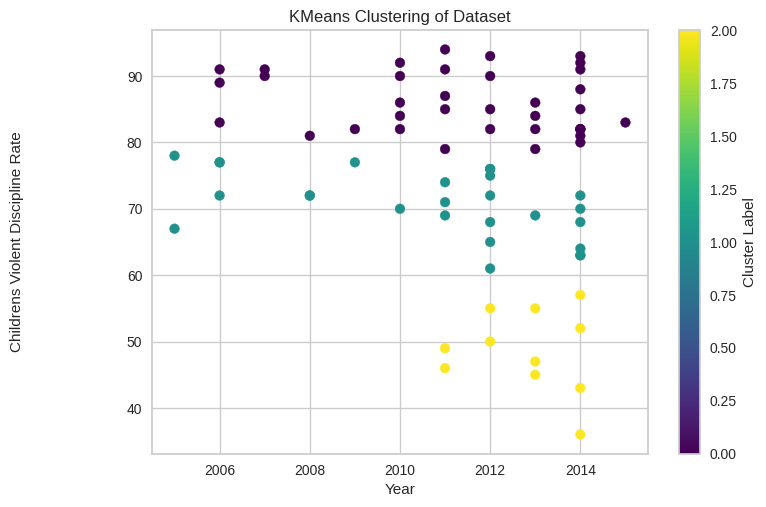

In [25]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd

# Read the CSV file into a DataFrame
dataset = pd.read_csv('childrens_violence new.csv')

# Assuming 'dataset' has columns named 'Year', 'Percentage_Back', and 'Entity' for clustering
X = dataset[['Year', 'Childrens Violent Discipline Rate\n\n\n\n\n\n']].values

# Instantiate PCA and fit-transform the data
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Instantiate KMeans with the desired number of clusters
n_clusters = 3  # Example value for the number of clusters
kmeans = KMeans(n_clusters=n_clusters)

# Fit KMeans to the PCA-transformed data
kmeans.fit(X_pca)

# Get the cluster labels
cluster_labels = kmeans.labels_

# Transform PCA-reduced data back to the original space
X_original = pca.inverse_transform(X_pca)

# Add cluster labels to the original DataFrame
dataset['Cluster'] = cluster_labels

# Plot data points with cluster labels
plt.scatter(X_original[:, 0], X_original[:, 1], c=cluster_labels, cmap='viridis')
plt.xlabel('Year')
plt.ylabel('Childrens Violent Discipline Rate\n\n\n\n\n\n')
plt.title('KMeans Clustering of Dataset')
plt.colorbar(label='Cluster Label')
plt.show()


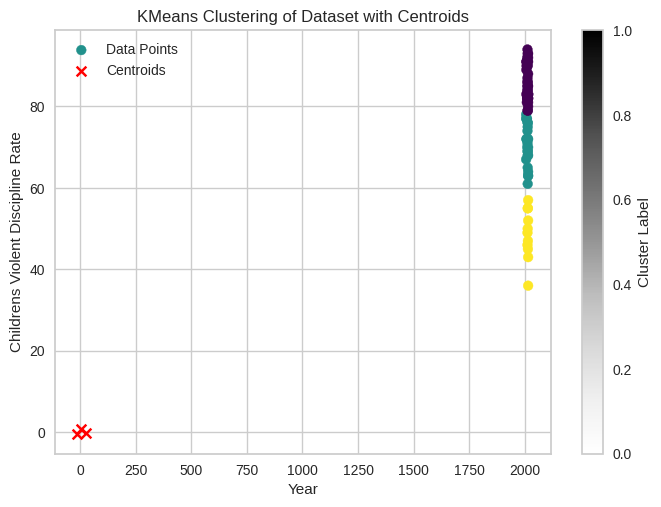

In [26]:
# Get cluster centroids
centroids = kmeans.cluster_centers_

# Plot data points with cluster labels
plt.scatter(X_original[:, 0], X_original[:, 1], c=cluster_labels, cmap='viridis', label='Data Points')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', color='red', label='Centroids')  # Plot centroids
plt.xlabel('Year')
plt.ylabel('Childrens Violent Discipline Rate')
plt.title('KMeans Clustering of Dataset with Centroids')
plt.colorbar(label='Cluster Label')
plt.legend()
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


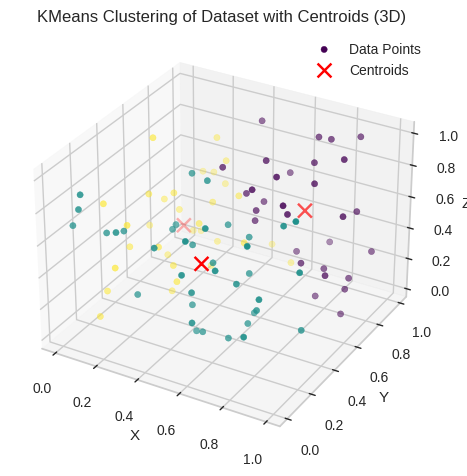

In [27]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Generate some sample data
np.random.seed(0)
X_original = np.random.rand(100, 3)  # Generating random 3-dimensional data

# Perform KMeans clustering
kmeans = KMeans(n_clusters=3)
cluster_labels = kmeans.fit_predict(X_original)
centroids = kmeans.cluster_centers_

# Plot 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot data points with cluster labels
ax.scatter(X_original[:, 0], X_original[:, 1], X_original[:, 2], c=cluster_labels, cmap='viridis', label='Data Points')

# Plot centroids
ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2], marker='x', color='red', s=100, label='Centroids')

# Set labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('KMeans Clustering of Dataset with Centroids (3D)')
ax.legend()

# Show plot
plt.show()


In [29]:
df.describe()


,Year,Childrens Violent Discipline Rate\n\n\n\n\n\n,Cluster
count,73.000000,73.000000,73.000000
mean,2011.328767,74.931507,0.863014
std,2.708294,14.041930,0.917652
min,2005.000000,36.000000,0.000000
25%,2010.000000,68.000000,0.000000
50%,2012.000000,78.000000,1.000000
75%,2014.000000,85.000000,2.000000
max,2015.000000,94.000000,2.000000


from matplotlib import pyplot as plt
_df_0['Year'].plot(kind='hist', bins=20, title='Year')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Childrens Violent Discipline Rate\n\n\n\n\n\n'].plot(kind='hist', bins=20, title='Childrens Violent Discipline Rate\n\n\n\n\n\n')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['Cluster'].plot(kind='hist', bins=20, title='Cluster')
plt.gca().spines[['top', 'right',]].set_visible(False)

/usr/local/lib/python3.10/dist-packages/pandas/plotting/_matplotlib/core.py:1259: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  scatter = ax.scatter(


from matplotlib import pyplot as plt
_df_3.plot(kind='scatter', x='Year', y='Childrens Violent Discipline Rate\n\n\n\n\n\n', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

/usr/local/lib/python3.10/dist-packages/pandas/plotting/_matplotlib/core.py:1259: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  scatter = ax.scatter(


from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='Childrens Violent Discipline Rate\n\n\n\n\n\n', y='Cluster', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Year']
  ys = series['Childrens Violent Discipline Rate\n\n\n\n\n\n']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_5.sort_values('Year', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Year')
_ = plt.ylabel('Childrens Violent Discipline Rate\n\n\n\n\n\n')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Year']
  ys = series['Cluster']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_6.sort_values('Year', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Year')
_ = plt.ylabel('Cluster')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Year']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Year'}, axis=1)
              .sort_values('Year', ascending=True))
  xs = counted['Year']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_7.sort_values('Year', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Year')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_8['Year'].plot(kind='line', figsize=(8, 4), title='Year')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_9['Childrens Violent Discipline Rate\n\n\n\n\n\n'].plot(kind='line', figsize=(8, 4), title='Childrens Violent Discipline Rate\n\n\n\n\n\n')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['Cluster'].plot(kind='line', figsize=(8, 4), title='Cluster')
plt.gca().spines[['top', 'right']].set_visible(False)